# 📊 Agricultural Pest Dataset Analysis
This notebook performs core data validation and exploration steps for training a pest classification model using the provided dataset.

In [3]:
import os
from PIL import Image
from collections import defaultdict
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Define path to extracted dataset
dataset_path = "pest_dataset"
image_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.gif')

# Data containers
class_distribution = {}
image_sizes = defaultdict(list)
unreadable_images = []


# Set seaborn style and color palette
sns.set(style='whitegrid')
sns.set_palette('Set2')

In [4]:
# Scan dataset: collect image counts, sizes, and check readability
for class_name in os.listdir(dataset_path):
    class_folder = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_folder):
        images = [f for f in os.listdir(class_folder) if f.lower().endswith(image_extensions)]
        class_distribution[class_name] = len(images)
        for image_file in images:
            image_path = os.path.join(class_folder, image_file)
            try:
                with Image.open(image_path) as img:
                    image_sizes[class_name].append(img.size)
            except Exception:
                unreadable_images.append(image_path)


C:\Users\justi\AppData\Local\Temp\ipykernel_28844\1148046963.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(palette='husl', x=df_dist.index, y='Image Count', data=df_dist)


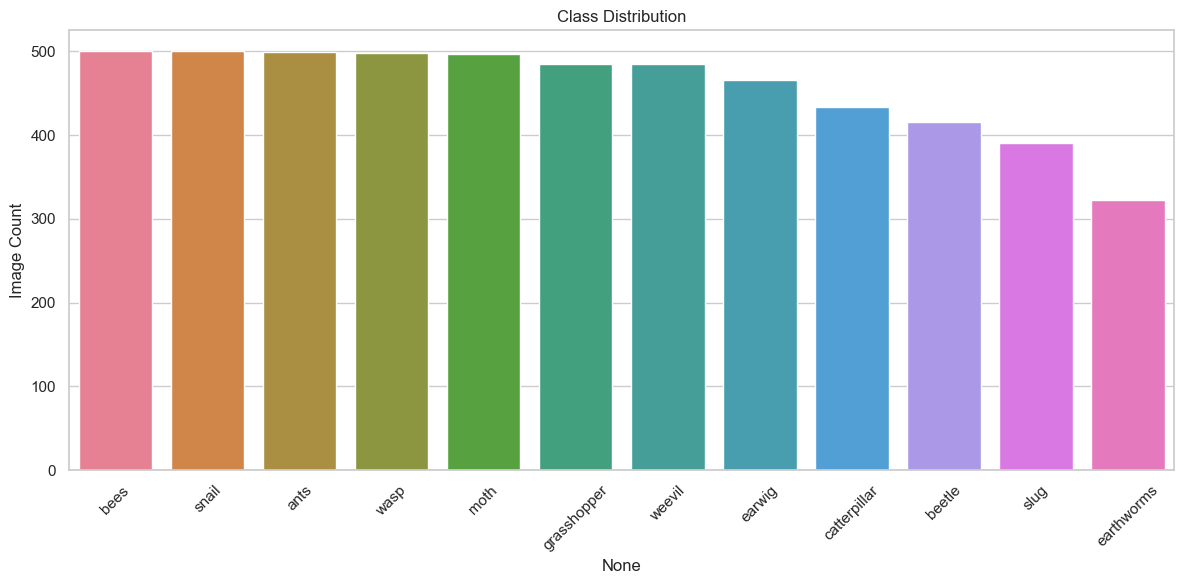

In [5]:
# Plot class distribution
plt.figure(figsize=(12, 6))
df_dist = pd.DataFrame.from_dict(class_distribution, orient='index', columns=['Image Count'])
df_dist = df_dist.sort_values('Image Count', ascending=False)
sns.barplot(palette='husl', x=df_dist.index, y='Image Count', data=df_dist)
plt.title("Class Distribution")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\justi\AppData\Local\Temp\ipykernel_28844\1369138509.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(palette='coolwarm', data=df_sizes, x="Class", y="Width")


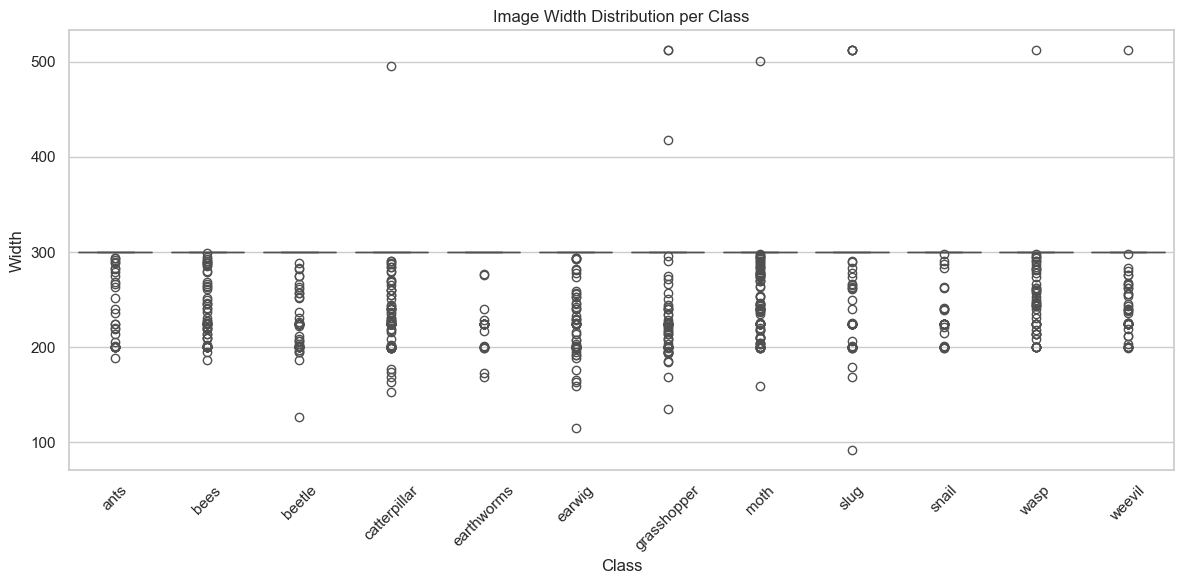

C:\Users\justi\AppData\Local\Temp\ipykernel_28844\1369138509.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(palette='coolwarm', data=df_sizes, x="Class", y="Height")


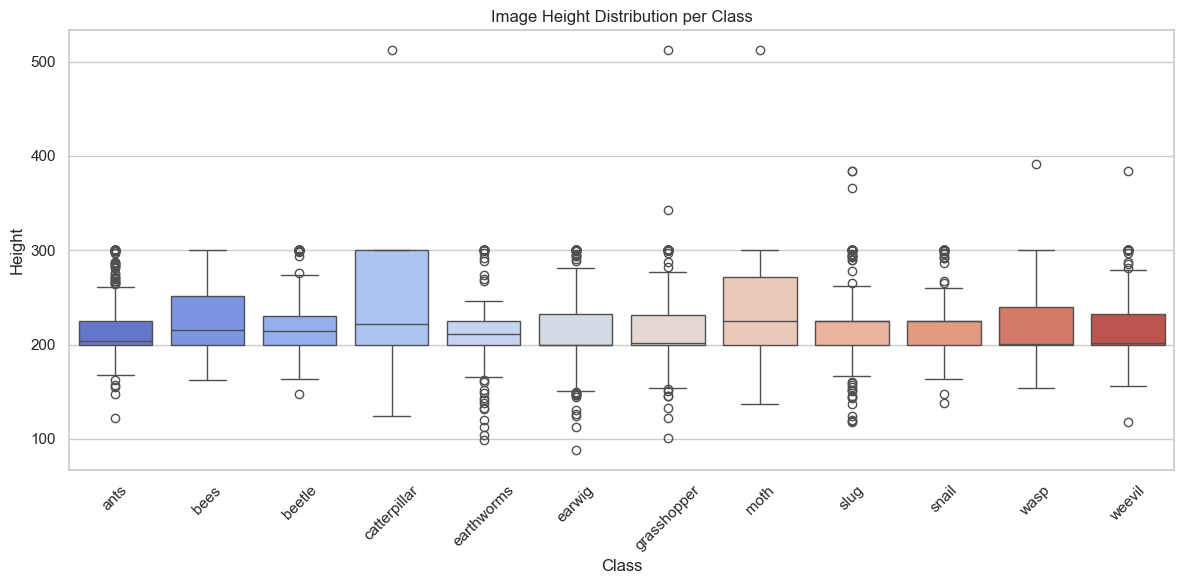

In [6]:
# Image size consistency
sizes_flat = [(cls, w, h) for cls, sizes in image_sizes.items() for (w, h) in sizes]
df_sizes = pd.DataFrame(sizes_flat, columns=["Class", "Width", "Height"])

plt.figure(figsize=(12, 6))
sns.boxplot(palette='coolwarm', data=df_sizes, x="Class", y="Width")
plt.title("Image Width Distribution per Class")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(palette='coolwarm', data=df_sizes, x="Class", y="Height")
plt.title("Image Height Distribution per Class")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


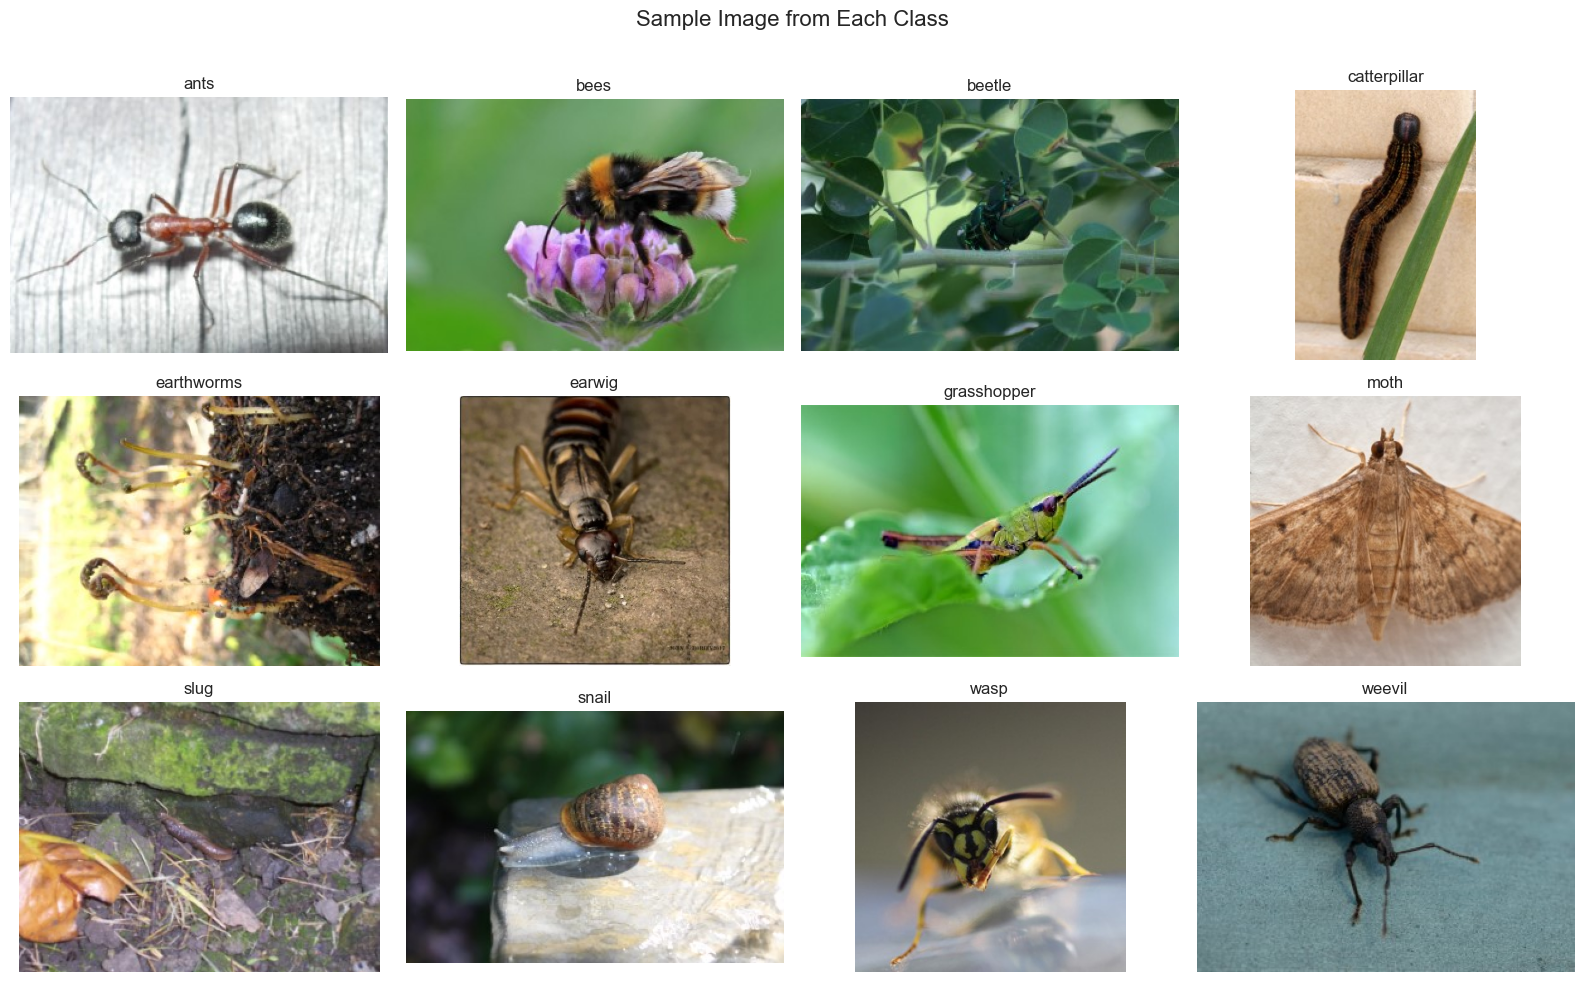

In [7]:
# Visual inspection - sample image from each class
fig, axes = plt.subplots(3, 4, figsize=(16, 10))
axes = axes.flatten()

for ax, (class_name, images) in zip(axes, image_sizes.items()):
    sample_path = os.path.join(dataset_path, class_name, random.choice(os.listdir(os.path.join(dataset_path, class_name))))
    with Image.open(sample_path) as img:
        ax.imshow(img)
        ax.set_title(class_name)
        ax.axis('off')

plt.tight_layout()
plt.suptitle("Sample Image from Each Class", fontsize=16)
plt.subplots_adjust(top=0.9)
plt.show()


In [8]:
# Summary
print(f"Total unreadable images: {len(unreadable_images)}")
if unreadable_images:
    print("Examples:", unreadable_images[:5])
else:
    print("✅ All images are readable.")


Total unreadable images: 0
✅ All images are readable.
